In [12]:
import pandas as pd
from PIL import Image
import os

In [13]:
labels = pd.read_csv('labels.csv')

In [16]:
print(labels[0:2])

        Image Index Finding Labels  Follow-up #  Patient ID  Patient Age  \
0  00001336_000.png     No Finding            0        1336           15   
1  00001337_000.png     No Finding            0        1337           53   

  Patient Gender View Position  OriginalImage[Width  Height]  \
0              M            PA                 2048     2500   
1              F            PA                 2992     2991   

   OriginalImagePixelSpacing[x     y]  
0                        0.171  0.171  
1                        0.143  0.143  


In [26]:
for row in labels.iterrows():
    if os.path.exists('augimages/' + row[1]['Image Index']):
        img = Image.open('augimages/' + row[1]['Image Index'])
        dir = 'trainImage/' + row[1]['Finding Labels'].replace(" ", "")
        isExist = os.path.exists(dir)
        if not isExist:
            os.makedirs(dir)
        img.save(dir + '/' + row[1]['Image Index'])


UnidentifiedImageError: cannot identify image file 'augimages/00003028_034.png'

In [27]:
import tensorflow as tf

batch_size = 32
img_height = 224
img_width = 224

data_dir = 'trainImage/'

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


2022-09-12 15:27:49.201631: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-12 15:27:49.347423: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-12 15:27:49.374197: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-12 15:27:49.920626: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

Found 5590 files belonging to 15 classes.
Using 4472 files for training.


2022-09-12 15:27:50.619261: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-12 15:27:50.705078: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-09-12 15:27:50.705119: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-09-12 15:27:50.706216: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (o

In [29]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 5590 files belonging to 15 classes.
Using 1118 files for validation.


In [30]:
class_names = train_ds.class_names
print(class_names)


['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'NoFinding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


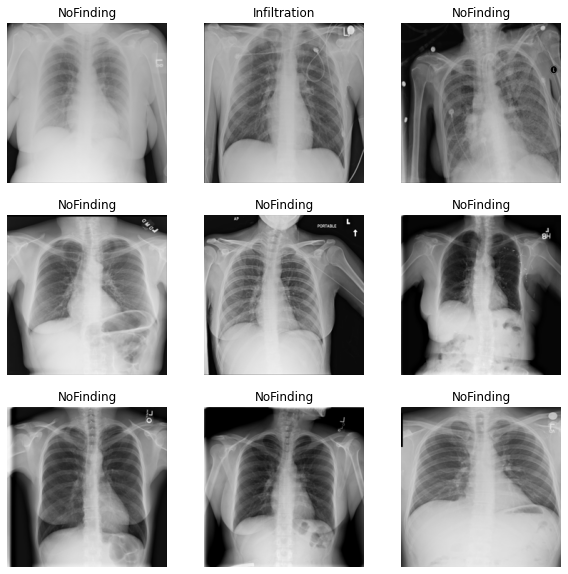

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [32]:
num_classes = 15

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


In [33]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [34]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)


Epoch 1/3
 45/140 [========>.....................] - ETA: 19s - loss: 1.3637 - accuracy: 0.6889

2022-09-12 15:30:39.735616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


140/140 [==============================] - 32s 217ms/step - loss: 1.3491 - accuracy: 0.6890 - val_loss: 1.2901 - val_accuracy: 0.7138
Epoch 2/3
 45/140 [========>.....................] - ETA: 17s - loss: 1.3061 - accuracy: 0.6979

2022-09-12 15:31:09.065957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


140/140 [==============================] - 28s 200ms/step - loss: 1.2986 - accuracy: 0.6939 - val_loss: 1.2467 - val_accuracy: 0.7138
Epoch 3/3
 45/140 [========>.....................] - ETA: 16s - loss: 1.2995 - accuracy: 0.6931

2022-09-12 15:31:36.787624: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


140/140 [==============================] - 27s 189ms/step - loss: 1.2824 - accuracy: 0.6941 - val_loss: 1.2491 - val_accuracy: 0.7138
